<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Random-Under-Sampling" data-toc-modified-id="Random-Under-Sampling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Under Sampling</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Check-for-nans-before-modelling" data-toc-modified-id="Check-for-nans-before-modelling-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Check for nans before modelling</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Deep-Learning-Imbalanced-Data" data-toc-modified-id="Deep-Learning-Imbalanced-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Deep Learning Imbalanced Data</a></span></li><li><span><a href="#Deep-Learning-Undersampled-Data" data-toc-modified-id="Deep-Learning-Undersampled-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Deep Learning Undersampled Data</a></span></li></ul></li><li><span><a href="#Keras-Deep-Learning-using-scikit-learn-API" data-toc-modified-id="Keras-Deep-Learning-using-scikit-learn-API-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Keras Deep Learning using scikit-learn API</a></span></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

> The datasets contains transactions made by credit cards in September
2013 by european cardholders.


> This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

> The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

> It contains only numerical input variables which are
the result of a PCA transformation.


> Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


> Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

> Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

> Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.


<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Detect the fraudulent activities. <br>
Metric : Recall
</div>

Remember that `Recall = TP / (TP + FN)`. In case of fraud detection,
classifying a fraud as
non-fraud (FN) is more risky so we use the metric `recall` to compare the 
performances of the models. Higher the recall, better is the model.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time
time_start_notebook = time.time()

# random state
random_state=100
np.random.seed(random_state) # we need this in each cell
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.3'), ('pandas', '0.25.1'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
import scipy
from scipy import stats

In [3]:
# scale and split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [4]:
# classifiers
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [5]:
# roc auc etc scores
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [6]:
# roc auc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [7]:
# confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


# Useful Scripts

In [10]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0]!='_' ]
    x = [i for i in x 
         if i not in 'os np pd sys time psycopg2'.split() ]
             

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

# Load the data

In [11]:
df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

## Target Distribution

0    284315
1       492
Name: Class, dtype: int64

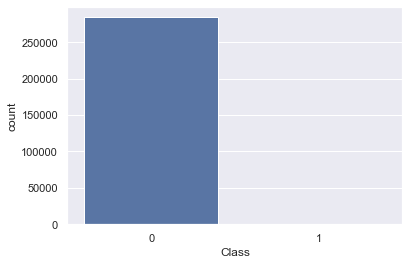

In [12]:
target = 'Class'
display(df[target].value_counts())
sns.countplot(df[target])

## Scaling

In [13]:
# RobustScaler is less prone to outliers.
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Random Under Sampling
- If classes are imbalanced, more frequent class causes overfitting.
- We can use undersampling of classes.
- Faster to train the model, since lower number of samples are remained.

Cons:
- Large number of rows may be dropped and risk of information loss.

In [14]:
# without removing outliers
n = df[target].value_counts().values[-1]

df_under = (df.groupby(target)
                .apply(lambda x: x.sample(n,random_state=random_state))
                .reset_index(drop=True)
               )

df_under[target].value_counts()

1    492
0    492
Name: Class, dtype: int64

## Train test split with stratify

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'scaled_time'],
      dtype='object')

In [17]:
# Without undersampling, (imbalanced data)
# Xtrain, and Xtest has all the features, later we can select our
# Xtrain and Xtest from df_train using some features.
target = 'Class'
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop(['Amount','Time',target],axis=1),
                                             df[target],
                                             test_size=0.2,
                                             stratify=df[target],
                                            random_state=random_state)

df.shape, Xtrain.shape, ytrain.shape

((284807, 33), (227845, 30), (227845,))

In [18]:
columns= df.columns.difference(['Amount','Time',target]).tolist() + [target]
print(columns)

['V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'scaled_amount', 'scaled_time', 'Class']


In [19]:
df_train = pd.DataFrame(np.c_[Xtrain,ytrain], columns=columns)

print(df.shape, df_train.shape)
df_train.head(2)

(284807, 33) (227845, 31)


,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time,Class
0,-1.137612,2.345154,-1.767247,0.833982,0.973168,-0.073571,0.802433,0.733137,-1.154087,-0.520340,0.494117,0.799935,0.494576,-0.479666,-0.917177,-0.184117,1.189459,0.937244,0.960749,0.062820,0.114953,0.430613,-0.240819,0.124011,0.187187,-0.402251,0.196277,0.190732,0.243974,0.633513,0.0
1,-1.028649,1.141569,2.492561,-0.242233,0.452842,-0.384273,1.256026,-0.816401,1.964560,-0.014216,0.432153,-2.140921,2.274477,0.114128,-1.652894,-0.617302,0.243791,-0.426168,-0.493177,0.350032,-0.380356,-0.037432,-0.503934,0.407129,0.604252,0.233015,-0.433132,-0.491892,-0.206945,-0.737074,0.0


In [20]:
df_test = pd.DataFrame(np.c_[Xtest,ytest],columns=columns)
print(df_test.shape)
df_test.head(2)

(56962, 31)


,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time,Class
0,0.046622,1.529678,-0.453615,1.282569,1.110333,-0.882716,1.04642,-0.117121,-0.679897,-0.923709,0.371519,-0.000047,0.512255,-2.091762,0.786796,0.159652,1.706939,0.458922,0.037665,0.240559,-0.338472,-0.839547,0.066527,0.836447,0.076790,-0.775158,0.261012,0.058359,-0.046112,0.815165,0.0
1,0.145870,0.107484,0.755127,-0.995936,1.159107,2.113961,0.03620,0.471777,0.627622,-0.598398,0.713816,1.091294,0.663878,-0.448057,0.146422,-0.445603,-0.462439,-0.373996,-0.966334,-0.107332,0.297644,1.285809,-0.140560,-0.910706,-0.449729,-0.235203,-0.036910,-0.227111,-0.167819,0.348218,0.0


In [21]:
# pd.concat([x[target].value_counts(normalize=True) for x in [df,df_train,df_test]])
# df, train and test have similar target distribution.

In [22]:
Xtrain_under,Xtest_under,ytrain_under,ytest_under = \
  train_test_split(df_under.drop(['Amount','Time',target],axis=1),
                   df_under[target],
                   test_size=0.2,
                   stratify=df_under[target],
                   random_state=random_state)


columns= df.columns.difference(['Amount','Time',target]).tolist() + [target]

df_train_under = pd.DataFrame(np.c_[Xtrain_under,ytrain_under], columns=columns)
df_test_under = pd.DataFrame(np.c_[Xtest_under,ytest_under],columns=columns)

print('Undersampled shape:', df_under.shape)
print('Undersampled train shape:', Xtrain_under.shape)
print('Undersampled test shape:', Xtest_under.shape)

df_train_under.head(2)

Undersampled shape: (984, 33)
Undersampled train shape: (787, 30)
Undersampled test shape: (197, 30)


,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time,Class
0,-0.762507,0.796995,1.361020,-0.376737,0.193995,-1.107362,0.771416,-0.214468,-0.234833,-0.412576,-0.512249,0.011223,0.031244,0.072900,0.381564,0.431446,-0.700399,-0.424826,-0.623204,-0.241844,-0.115505,-0.406488,0.258583,0.359625,-0.678234,-0.161506,-0.138255,0.164159,-0.294977,-0.284837,0.0
1,-1.165320,0.635656,0.053974,-0.382560,1.435596,0.473556,1.485924,-0.308678,-0.205255,-0.857615,0.445845,0.188776,0.722610,-1.216206,1.657659,-1.043794,1.201677,-0.859163,-1.076210,-0.275043,0.256471,1.335942,-0.111328,-1.060521,0.191532,0.037675,-0.309173,-0.022691,0.989171,0.538152,0.0


## Check for nans before modelling

In [23]:
df.isnull().sum().sum()

0

In [24]:
df_under.isnull().sum().sum()

0

In [25]:
df_under.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'scaled_time'],
      dtype='object')

# Modelling

In [26]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

## Deep Learning Imbalanced Data

In [27]:
n_inputs = Xtrain.shape[1]

clf_imb = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [28]:
show_method_attributes(clf_imb)

,0,1,2,3,4,5,6
0,add,compute_output_shape,get_input_shape_at,input_shape,optimizer,predict_proba,supports_masking
1,add_loss,count_params,get_layer,input_spec,output,reset_metrics,test_on_batch
2,add_metric,dtype,get_losses_for,inputs,output_mask,reset_states,to_json
3,add_update,evaluate,get_output_at,layers,output_names,run_internal_graph,to_yaml
4,add_weight,evaluate_generator,get_output_mask_at,load_weights,output_shape,save,train_on_batch
5,assert_input_compatibility,fit,get_output_shape_at,losses,outputs,save_weights,trainable
6,build,fit_generator,get_updates_for,metrics,pop,set_weights,trainable_weights
7,built,from_config,get_weights,metrics_names,predict,state_updates,updates
8,call,get_config,input,model,predict_classes,stateful,uses_learning_phase
9,compile,get_input_at,input_mask,name,predict_generator,summary,weights


In [29]:
clf_imb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [30]:
clf_imb.compile(Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
clf_imb.fit(Xtrain, ytrain,
            validation_split=0.2,
            batch_size=25,
            epochs=10,
            shuffle=True,
            verbose=5)

Train on 182276 samples, validate on 45569 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [32]:
ypreds = clf_imb.predict(Xtest, batch_size=200, verbose=0)

In [33]:
ypreds_imb = clf_imb.predict_classes(Xtest, batch_size=200, verbose=0)

In [34]:
ypreds_imb

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
cm = confusion_matrix(ytest,ypreds_imb)
vals = cm.ravel()

cm

array([[56846,    18],
       [   21,    77]])

In [36]:
print('Keras Imbalaned Data Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

Keras Imbalaned Data Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  21
Incorrect Percent:  21.43 %


In [37]:
report = classification_report(ytest, ypreds_imb)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Deep Learning Undersampled Data

In [38]:
n_inputs = Xtrain_under.shape[1]

clf_under = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [39]:
clf_under.compile(Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
clf_under.fit(Xtrain_under, ytrain_under,
            validation_split=0.2,
            batch_size=25,
            epochs=20,
            shuffle=True,
            verbose=2)

Train on 629 samples, validate on 158 samples
Epoch 1/20
 - 0s - loss: 0.9956 - accuracy: 0.5962 - val_loss: 0.5190 - val_accuracy: 0.7152
Epoch 2/20
 - 0s - loss: 0.4131 - accuracy: 0.7711 - val_loss: 0.4325 - val_accuracy: 0.8228
Epoch 3/20
 - 0s - loss: 0.3425 - accuracy: 0.8633 - val_loss: 0.3722 - val_accuracy: 0.8734
Epoch 4/20
 - 0s - loss: 0.2950 - accuracy: 0.8951 - val_loss: 0.3248 - val_accuracy: 0.8924
Epoch 5/20
 - 0s - loss: 0.2539 - accuracy: 0.9110 - val_loss: 0.2864 - val_accuracy: 0.9051
Epoch 6/20
 - 0s - loss: 0.2222 - accuracy: 0.9205 - val_loss: 0.2589 - val_accuracy: 0.9114
Epoch 7/20
 - 0s - loss: 0.2002 - accuracy: 0.9285 - val_loss: 0.2334 - val_accuracy: 0.9177
Epoch 8/20
 - 0s - loss: 0.1829 - accuracy: 0.9285 - val_loss: 0.2154 - val_accuracy: 0.9177
Epoch 9/20
 - 0s - loss: 0.1684 - accuracy: 0.9332 - val_loss: 0.2019 - val_accuracy: 0.9177
Epoch 10/20
 - 0s - loss: 0.1577 - accuracy: 0.9332 - val_loss: 0.1902 - val_accuracy: 0.9241
Epoch 11/20
 - 0s - los

In [41]:
ypreds_under = clf_under.predict(Xtest_under, batch_size=200, verbose=0)

In [42]:
ypreds_under = clf_under.predict_classes(Xtest_under, batch_size=200, verbose=0)

In [43]:
ypreds_under

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [44]:
cm = confusion_matrix(ytest_under,ypreds_under)
vals = cm.ravel()

cm

array([[95,  4],
       [ 7, 91]])

In [45]:
print('Keras Undersampled Train Test Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

Keras Undersampled Train Test Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  7
Incorrect Percent:  7.14 %


In [46]:
report_under = classification_report(ytest_under, ypreds_under)
print(report_under)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



# Keras Deep Learning using scikit-learn API

In [47]:
import numpy as np
import pandas as pd

from keras.models import Sequential

from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [48]:
Xtrain_under.shape, ytrain_under.shape

((787, 30), (787,))

In [49]:
X = Xtrain_under.to_numpy()
y = ytrain_under.to_numpy().reshape(-1,1)
number_of_features = X.shape[1]

number_of_features

30

In [50]:
def baseline_model(number_of_features=number_of_features):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=number_of_features, activation='relu'))
    
    # last layer with 1 output
    # if one hot enncoded use softmax activation
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    # if target is one-hot encode and multi-label use categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [51]:
estimator = KerasClassifier(build_fn=baseline_model,
                            epochs=20,
                            number_of_features=number_of_features,
                            batch_size=5,
                            verbose=0)

kfold = KFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 93.27% (3.85%)


# Time Taken

In [52]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))


Time taken to run whole notebook: 0 hr 2 min 5 secs
